<a href="https://colab.research.google.com/github/ZiyangZ/Machine-learning/blob/master/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 1 
##Do feature extraction with data augmentation

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG19
from keras import layers
from keras import models, Model
from keras import optimizers
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input, decode_predictions
from google.colab.patches import cv2_imshow
%matplotlib inline
import matplotlib.pyplot as plt
from keras import backend as K
import numpy as np
import os
import zipfile
import cv2

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
  
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2019-04-17 13:45:50--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.161.80, 2404:6800:4004:808::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.161.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   107MB/s    in 0.6s    

2019-04-17 13:45:51 (107 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

conv_base = VGG19(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3))

conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=1e-5), 
    metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
100/100 [==============================] - 19s 191ms/step - loss: 0.6131 - acc: 0.6715 - val_loss: 0.5116 - val_acc: 0.7970
Epoch 2/50
100/100 [==============================] - 19s 190ms/step - loss: 0.5125 - acc: 0.7720 - val_loss: 0.4378 - val_acc: 0.8190
Epoch 3/50
100/100 [==============================] - 19s 188ms/step - loss: 0.4526 - acc: 0.7990 - val_loss: 0.3994 - val_acc: 0.8380
Epoch 4/50
100/100 [==============================] - 18s 181ms/step - loss: 0.4239 - acc: 0.8180 - val_loss: 0.3696 - val_acc: 0.8490
Epoch 5/50
100/100 [==============================] - 18s 179ms/step - loss: 0.3890 - acc: 0.8275 - val_loss: 0.3451 - val_acc: 0.8600
Epoch 6/50
100/100 [==============================] - 19s 192ms/step - loss: 0.3776 - acc: 0.8405 - val_loss: 0.3350 - val_acc: 0.8700
Epoch 7/50
100/100 [==============================] - 18s 180ms/step - loss: 0.3623 - acc: 0.8495 - val_lo

In [0]:
val_loss, val_acc = model.evaluate_generator(validation_generator, steps=50)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

Validation loss: 0.24540765300393105
Validation accuracy: 0.8869999945163727


#Problem 2
##Do fine-tuning with data augmentation

In [0]:
del model

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

conv_base = VGG19(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3))

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-5), 
    metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Colocations handled automatically by placer.
80142336/80134624 [==============================] - 5s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
100/100 [==============================] - 24s 239ms/step - loss: 0.4940 - acc: 0.7555 - val_loss: 0.3342 - val_acc: 0.8560
Epoch 2/100
100/100 [==============================] - 18s 184ms/step - loss: 0.3004 - acc: 0.8680 - val_loss: 0.2375 - val_acc: 0.9080
Epoch 3/100
100/100 [==============================] - 19s 191ms/step - loss: 0.2326 - acc: 0.9040 - val_loss: 0.2283 - val_acc: 0.9040
Epoch 4/100
100/100 [==============================] - 18s 183ms/step - loss: 0.2076 - acc: 0.9145 - val_loss: 0.1897 - val_acc: 0.9160
Epoch 5/100
100/100 [==============================] - 18s 184ms/step - 

In [7]:
val_loss, val_acc = model.evaluate_generator(validation_generator, steps=50)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

Validation loss: 0.3914009247901595
Validation accuracy: 0.9509999918937683


In [0]:
model.save('cats_and_dogs.h5')

In [0]:
from google.colab import files
with open('cats_and_dogs.h5', 'r') as f:
  files.download('cats_and_dogs.h5')

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/cats_and_dogs.h5')

#Problem 3

In [0]:
img_path = '/content/drive/My Drive/Colab Notebooks/dog.jpg'
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [80]:
#Rewrite the model in problem 2 so that the layers inside vgg19 can be accessed
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

conv_base = VGG19(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3))

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

x = layers.Flatten(name='flatten')(conv_base.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(1, activation='sigmoid')(x)
model = Model(inputs= conv_base.input, outputs=x) #the structure is exactly the same with the model in problem 2

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-5), 
    metrics=['acc'])


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [90]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [82]:

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 22s 221ms/step - loss: 0.4751 - acc: 0.7765 - val_loss: 0.2883 - val_acc: 0.8880
Epoch 2/100
100/100 [==============================] - 20s 199ms/step - loss: 0.2823 - acc: 0.8850 - val_loss: 0.2555 - val_acc: 0.8940
Epoch 3/100
100/100 [==============================] - 19s 193ms/step - loss: 0.2337 - acc: 0.9005 - val_loss: 0.2767 - val_acc: 0.8960
Epoch 4/100
100/100 [==============================] - 19s 191ms/step - loss: 0.1909 - acc: 0.9245 - val_loss: 0.2147 - val_acc: 0.9180
Epoch 5/100
100/100 [==============================] - 20s 196ms/step - loss: 0.1626 - acc: 0.9375 - val_loss: 0.1860 - val_acc: 0.9220
Epoch 6/100
100/100 [==============================] - 19s 194ms/step - loss: 0.1467 - acc: 0.9485 - val_loss: 0.1733 - val_acc: 0.9310
Epoch 7/100
100/100 [==============================] - 20s 197ms/step - loss: 0.1381 - acc: 0.9490 - val_loss: 0.2066 - val_acc: 0.9210
Epoch 8/100
100/100 [===========================

In [83]:
val_loss, val_acc = model.evaluate_generator(validation_generator, steps=50)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

Validation loss: 0.31620899307209627
Validation accuracy: 0.9479999935626984


In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/cats_and_dogs2.h5')

In [0]:
img_path = '/content/drive/My Drive/Colab Notebooks/dog.jpg'
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

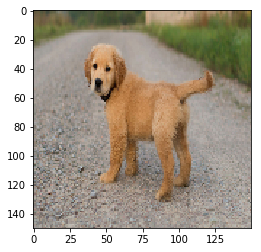

In [88]:
plt.imshow(img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


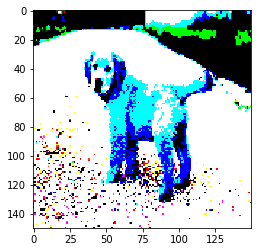

In [89]:
plt.imshow(x[0])
plt.show()

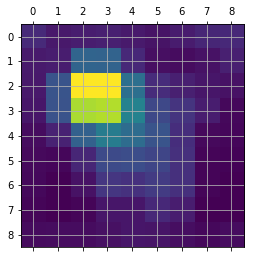

In [94]:
idx = 0
last_conv_layer = model.get_layer('block5_conv3')
grads = K.gradients(model.output[:,0], last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.grid(None)
plt.show()

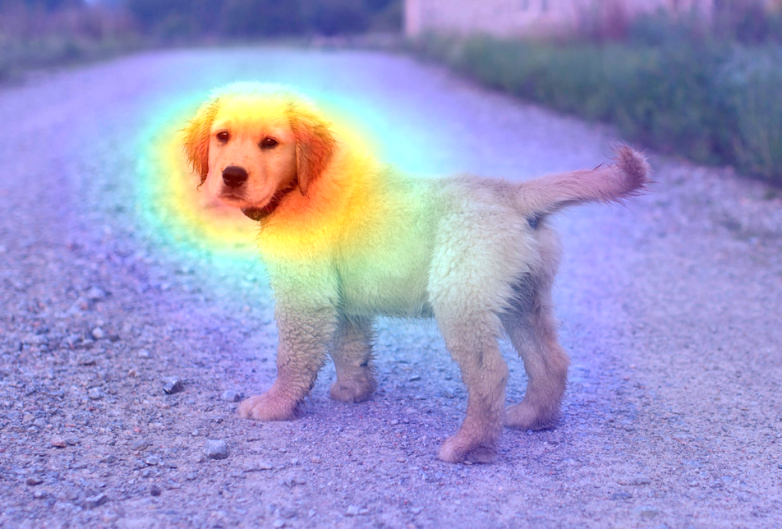

In [95]:
img1 = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img1.shape[1], img1.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img1
cv2_imshow(superimposed_img)

#Homework 4